In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd /content/drive/MyDrive/Data Open Championship 2022/2-data/IPEDS_Dataset_Encoded

/content/drive/.shortcut-targets-by-id/1VhaW8PqOm10rxodZbXmRV2GHxBJq9Qxh/Data Open Championship 2022/2-data/IPEDS_Dataset_Encoded


In [4]:
ls

'12-Month Enrollment'/             'Graduation Rates'/
'Academic Libraries'/              'Institutional Characteristics'/
'Admission and Test Scores'/       'Institutional Finances'/
 Completions/                      'Outcome Measures'/
'Employees by Assigned Position'/  'Student Financial Aid'/
'Fall Enrollment'/


In [5]:
path = '/content/drive/.shortcut-targets-by-id/1VhaW8PqOm10rxodZbXmRV2GHxBJq9Qxh/Data Open Championship 2022/2-data/IPEDS_Dataset_Encoded'

12-Month Enrollment

- EFFY_2015-2021_data.csv
- Dataset Overview: 12-month headcount broken down by race/ethnicity, gender and level of student.

In [6]:
data12 = pd.read_csv(path + '/12-Month Enrollment/EFFY_2015-2021_data.csv')

data12.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,unitid,effyalev,effylev,lstudy,efytotlt,efytotlm,efytotlw,efyaiant,efyaianm,efyaianw,...,efy2mort,efy2morm,efy2morw,efyunknt,efyunknm,efyunknw,efynralt,efynralm,efynralw,year
0,100654,All students total,All students total,Generated total,6628,2560,4068,18,8,10,...,83,28,55,579,198,381,90,43,47,2021
1,100654,"All students, Undergraduate total",Undergraduate,Undergraduate,5529,2215,3314,15,7,8,...,80,27,53,258,103,155,40,19,21,2021
2,100654,"All students, Undergraduate, Degree/certificat...","Not applicable, undergraduate detail",Undergraduate,5517,2210,3307,15,7,8,...,80,27,53,258,103,155,40,19,21,2021
3,100654,"All students, Undergraduate, Degree/certificat...","Not applicable, undergraduate detail",Undergraduate,1632,677,955,5,2,3,...,32,11,21,70,39,31,5,3,2,2021
4,100654,"All students, Undergraduate, Other degree/cert...","Not applicable, undergraduate detail",Undergraduate,3885,1533,2352,10,5,5,...,48,16,32,188,64,124,35,16,19,2021


In [7]:
data12.info() #effyalev missing data, rest are fine

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284172 entries, 0 to 284171
Data columns (total 35 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   unitid    284172 non-null  int64 
 1   effyalev  207308 non-null  object
 2   effylev   284172 non-null  object
 3   lstudy    284172 non-null  object
 4   efytotlt  284172 non-null  int64 
 5   efytotlm  284172 non-null  int64 
 6   efytotlw  284172 non-null  int64 
 7   efyaiant  284172 non-null  int64 
 8   efyaianm  284172 non-null  int64 
 9   efyaianw  284172 non-null  int64 
 10  efyasiat  284172 non-null  int64 
 11  efyasiam  284172 non-null  int64 
 12  efyasiaw  284172 non-null  int64 
 13  efybkaat  284172 non-null  int64 
 14  efybkaam  284172 non-null  int64 
 15  efybkaaw  284172 non-null  int64 
 16  efyhispt  284172 non-null  int64 
 17  efyhispm  284172 non-null  int64 
 18  efyhispw  284172 non-null  int64 
 19  efynhpit  284172 non-null  int64 
 20  efynhpim  284172 non-null 

In [8]:
data12[['unitid', 'year']].groupby('year').count()

,unitid
year,
2015,16476
2016,15726
2017,15395
2018,14941
2019,14326
2020,103704
2021,103604


In [9]:
data12[data12.effyalev.isna()][['unitid', 'year']].groupby('year').count()

,unitid
year,
2015,16476
2016,15726
2017,15395
2018,14941
2019,14326


In [10]:
data12[['unitid', 'year']].groupby('year').nunique()

,unitid
year,
2015,7322
2016,6951
2017,6785
2018,6561
2019,6272
2020,6169
2021,6086


In [11]:
data12.groupby(['year', 'effylev', 'lstudy']).size() #Not applicable is further explained by column deleted earlier

year  effylev                               lstudy         
2015  All students total                    Generated total     7322
      Graduate                              Graduate            2142
      Undergraduate                         Undergraduate       7012
2016  All students total                    Generated total     6951
      Graduate                              Graduate            2135
      Undergraduate                         Undergraduate       6640
2017  All students total                    Generated total     6785
      Graduate                              Graduate            2132
      Undergraduate                         Undergraduate       6478
2018  All students total                    Generated total     6561
      Graduate                              Graduate            2118
      Undergraduate                         Undergraduate       6262
2019  All students total                    Generated total     6272
      Graduate                             

In [12]:
data12.groupby(['year', 'effyalev', 'effylev']).size() #only 2020-2021

year  effyalev                                                                                         effylev                             
2020  All students total                                                                               All students total                      6169
      All students, Graduate                                                                           Graduate                                2049
      All students, Undergraduate total                                                                Undergraduate                           5881
      All students, Undergraduate, Degree/certificate-seeking total                                    Not applicable, undergraduate detail    5878
      All students, Undergraduate, Degree/certificate-seeking, First-time                              Not applicable, undergraduate detail    5669
      All students, Undergraduate, Non-degree/certificate-seeking                                      Not applicable, u

In [13]:
#use 2015-2019 for now

data12_pre2020 = data12[~data12.year.isin([2020, 2021])]
df = data12_pre2020[['unitid', 'year']].groupby('unitid').nunique()
unitid_lst = np.array(df[df.year == 5].index)
data12_pre2020 = data12_pre2020[data12_pre2020.unitid.isin(unitid_lst)]
data12_pre2020

,unitid,effyalev,effylev,lstudy,efytotlt,efytotlm,efytotlw,efyaiant,efyaianm,efyaianw,...,efy2mort,efy2morm,efy2morw,efyunknt,efyunknm,efyunknw,efynralt,efynralm,efynralw,year
207308,100654,NaN,All students total,Generated total,6686,2627,4059,17,5,12,...,72,24,48,386,120,266,83,42,41,2019
207309,100654,NaN,Undergraduate,Undergraduate,5530,2290,3240,14,4,10,...,67,22,45,220,85,135,42,22,20,2019
207310,100654,NaN,Graduate,Graduate,1156,337,819,3,1,2,...,5,2,3,166,35,131,41,20,21,2019
207311,100663,NaN,All students total,Generated total,25705,9745,15960,70,26,44,...,934,324,610,374,162,212,1254,735,519,2019
207312,100663,NaN,Undergraduate,Undergraduate,14808,5814,8994,46,15,31,...,664,240,424,90,44,46,413,243,170,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284164,487649,NaN,Graduate,Graduate,18,11,7,0,0,0,...,0,0,0,0,0,0,0,0,0,2015
284165,487658,NaN,All students total,Generated total,40,37,3,0,0,0,...,0,0,0,1,1,0,0,0,0,2015
284166,487658,NaN,Undergraduate,Undergraduate,40,37,3,0,0,0,...,0,0,0,1,1,0,0,0,0,2015
284170,487676,NaN,All students total,Generated total,15,1,14,0,0,0,...,1,0,1,0,0,0,1,0,1,2015


<ipython-input-14-956650baf5e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['ratio'] = df1.efytotlm / df1.efytotlt


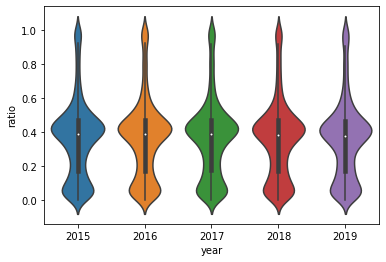

In [14]:
df1 = data12_pre2020[data12_pre2020.effylev == 'All students total']
df1['ratio'] = df1.efytotlm / df1.efytotlt
sns.violinplot(data = df1, x = 'year', y = 'ratio')

In [15]:
for i in range(10):
  #tot = 4 + 3i
  #men = 5 + 3i
  #women = 6 + 3i
  print(4 + 3 * i, df1.columns[4 + 3*i])

4 efytotlt
7 efyaiant
10 efyasiat
13 efybkaat
16 efyhispt
19 efynhpit
22 efywhitt
25 efy2mort
28 efyunknt
31 efynralt


- EFIA_2015-2021_data.csv

- Dataset Overview: 12-month instructional activity. 


In [16]:
df12 = pd.read_csv(path + '/12-Month Enrollment/EFIA_2015-2021_data.csv')

df12.head()

,unitid,cdactua,cnactua,cdactga,efteug,eftegd,fteug,ftegd,ftedpp,year
0,100654,138948.0,NaN,15763.0,4632.0,657.0,4632.0,657.0,NaN,2021
1,100663,369491.0,NaN,171896.0,12316.0,7162.0,12316.0,7162.0,1372.0,2021
2,100690,7488.0,NaN,7196.0,250.0,300.0,250.0,300.0,NaN,2021
3,100706,220250.0,NaN,29123.0,7342.0,1213.0,7342.0,1213.0,90.0,2021
4,100724,102037.0,NaN,10034.0,3401.0,418.0,3401.0,418.0,92.0,2021


In [17]:
df12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46146 entries, 0 to 46145
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   unitid   46146 non-null  int64  
 1   cdactua  30412 non-null  float64
 2   cnactua  15748 non-null  float64
 3   cdactga  14653 non-null  float64
 4   efteug   44047 non-null  float64
 5   eftegd   14644 non-null  float64
 6   fteug    44047 non-null  float64
 7   ftegd    14644 non-null  float64
 8   ftedpp   5464 non-null   float64
 9   year     46146 non-null  int64  
dtypes: float64(8), int64(2)
memory usage: 3.5 MB


In [18]:
df = df12[(df12.unitid.isin(unitid_lst)) & (~df.year.isin([2020, 2021]))]

sns.violinplot(data = df[df.cdactua.notna()], x = 'year', y = 'cdactua')

<ipython-input-18-f96d87d68f1c>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df12[(df12.unitid.isin(unitid_lst)) & (~df.year.isin([2020, 2021]))]


ValueError: ignored

Academic Libraries

Admission and Test Scores

In [ ]:
dfscores = pd.read_csv(path + '/Admission and Test Scores/ADM_2015-2021_data.csv')

dfscores.head()

In [ ]:
for i in range(1, 10):
  print(set(dfscores.iloc[:, i]))
  # will need to differ between know, don't know as well asordinal on the rest
  #scale_mapper = {"Low":1, "Medium":2, "High":3}
  #df["Scale"] = df["Score"].replace(scale_mapper)

In [ ]:
dfscores.info()

In [ ]:
df = dfscores[dfscores.actcm25.notna()]

for i in range(1, 10):
  col = df.columns[i]
  plt.figure(i)
  plt.figure(figsize=(10,10))
  sns.violinplot(data = df, x = col, y = 'actcm25')
  #print(df[['year', col, 'actcm25']].groupby(['year', col]).agg(['mean', 'count']))
  #add pct act firsttime degree andgo from there with split category

In [ ]:
def get_plots(df, test):
  curr_df = df[df[test].notna()]
  for i in range(1, 10):
    col = df.columns[i]
    plt.figure(i)
    plt.figure(figsize=(10,10))
    sns.violinplot(data = df, x = col, y = test)

get_plots(dfscores, 'actcm75')

In [ ]:
get_plots(dfscores, 'satmt75')

Completions

In [ ]:
dfc = pd.read_csv(path + '/Completions/CDEP_2015-2021_data.csv')

dfc.head()

In [ ]:
dfc.info()

In [ ]:
dfc = pd.read_csv(path + '/Completions/C_A_2015-2021_data.csv')

dfc.head() #maybe measure rewarded ratio vs ratio of school to get difference ..., may need nlp to cateogrize majors

In [ ]:
set(dfc.cipcode)

In [ ]:
dfc = pd.read_csv(path + '/Completions/C_C_2015-2021_data.csv')

df = dfc[['awlevelc', 'year', 'csund18', 'cs18_24', 'cs25_39', 'csabv40']].groupby(['year', 'awlevelc']).sum()

df = df.reset_index()
yr_lst = [2015, 2016, 2017, 2018, 2019, 2020, 2021]
age_lst = ['csund18', 'cs18_24', 'cs25_39', 'csabv40']

df1 = dfc.groupby('year').sum().reset_index()
df1

In [ ]:
df['csund18'][df.year == 2015].div(df1['csund18'][df1.year == 2015][0])

d = {1:[], 2:[], 3:[], 4:[]}
count = 0
for i in yr_lst:
  sub_count = 1
  for j in age_lst:
    a = df[j][df.year == i].div(df1[j][df1.year == i][count])
    d[sub_count].extend(a)
    sub_count += 1
  count += 1
for i in range(4):
  df[age_lst[i]] = d[i + 1]
df

In [ ]:
sns.set(rc={'figure.figsize':(18,10)})
sns.lineplot(data=df, x='year', y='csund18', hue='awlevelc')

In [ ]:
sns.set(rc={'figure.figsize':(18,10)})
sns.lineplot(data=df, x='year', y='cs18_24', hue='awlevelc')

In [ ]:
sns.set(rc={'figure.figsize':(18,10)})
sns.lineplot(data=df, x='year', y='cs25_39', hue='awlevelc')

In [ ]:
sns.set(rc={'figure.figsize':(18,10)})
sns.lineplot(data=df, x='year', y='csabv40', hue='awlevelc')